In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Paths
iris_path = "iris.csv"


# 1. KNN Classifier on Iris Dataset
print("\n--- Iris Dataset ---")
iris_df = pd.read_csv(iris_path)

X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Choosing k value (typically sqrt(n))
k_iris = int(np.sqrt(len(X_train_iris)))
knn_iris = KNeighborsClassifier(n_neighbors=k_iris)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

print(f"Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:")
print(classification_report(y_test_iris, y_pred_iris))






--- Iris Dataset ---
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# 2. KNN Classifier on Diabetes Dataset with Scaling
diabetes_path = "diabetes (1).csv"
diabetes_df = pd.read_csv(diabetes_path)

X_diabetes = diabetes_df.drop('Outcome', axis=1)
y_diabetes = diabetes_df['Outcome']

scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)

k_diabetes = int(np.sqrt(len(X_train_db)))
knn_diabetes = KNeighborsClassifier(n_neighbors=k_diabetes)
knn_diabetes.fit(X_train_db, y_train_db)
y_pred_db = knn_diabetes.predict(X_test_db)

print(f"Accuracy: {accuracy_score(y_test_db, y_pred_db):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_db, y_pred_db))

Accuracy: 0.7468
Confusion Matrix:
[[89 10]
 [29 26]]



--- Heart Dataset ---
Best k: 6 with Accuracy: 0.9344


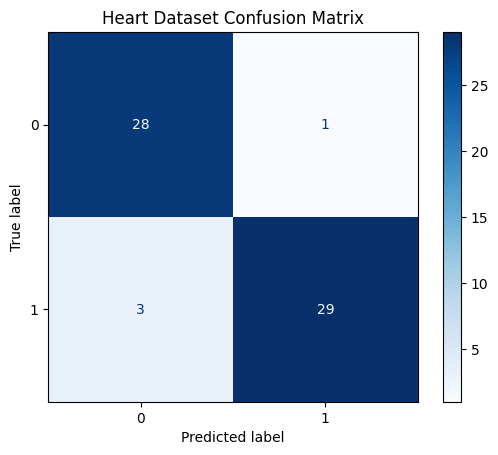

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [5]:
# 3. KNN Classifier on Heart Dataset with k tuning

heart_path = "heart.csv"
print("\n--- Heart Dataset ---")
heart_df = pd.read_csv(heart_path)

X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']

scaler = StandardScaler()
X_heart_scaled = scaler.fit_transform(X_heart)

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart_scaled, y_heart, test_size=0.2, random_state=42)

# Finding best k
scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_heart, y_train_heart)
    scores.append(knn.score(X_test_heart, y_test_heart))

best_k = k_range[np.argmax(scores)]
print(f"Best k: {best_k} with Accuracy: {max(scores):.4f}")

# Train with best k
knn_heart = KNeighborsClassifier(n_neighbors=best_k)
knn_heart.fit(X_train_heart, y_train_heart)
y_pred_heart = knn_heart.predict(X_test_heart)

# Plot Confusion Matrix
cm = confusion_matrix(y_test_heart, y_pred_heart)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_heart.classes_)
disp.plot(cmap='Blues')
plt.title("Heart Dataset Confusion Matrix")
plt.show()

# Plot Classification Report
print("Classification Report:")
print(classification_report(y_test_heart, y_pred_heart))


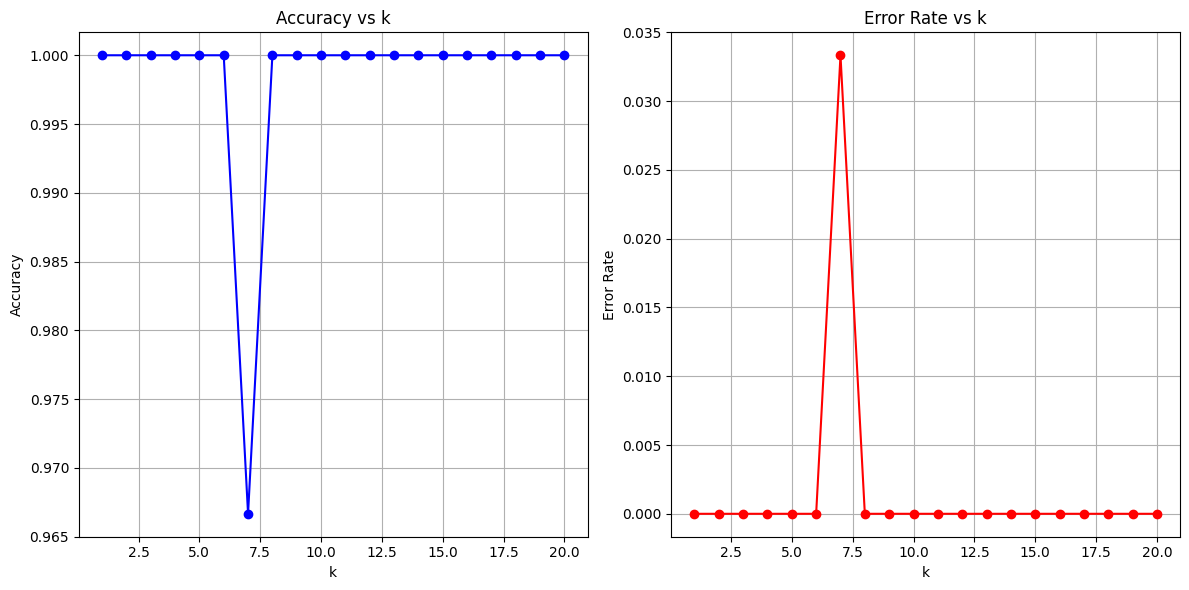

k=1, Accuracy: 100.00%, Error Rate: 0.00%
k=2, Accuracy: 100.00%, Error Rate: 0.00%
k=3, Accuracy: 100.00%, Error Rate: 0.00%
k=4, Accuracy: 100.00%, Error Rate: 0.00%
k=5, Accuracy: 100.00%, Error Rate: 0.00%
k=6, Accuracy: 100.00%, Error Rate: 0.00%
k=7, Accuracy: 96.67%, Error Rate: 3.33%
k=8, Accuracy: 100.00%, Error Rate: 0.00%
k=9, Accuracy: 100.00%, Error Rate: 0.00%
k=10, Accuracy: 100.00%, Error Rate: 0.00%
k=11, Accuracy: 100.00%, Error Rate: 0.00%
k=12, Accuracy: 100.00%, Error Rate: 0.00%
k=13, Accuracy: 100.00%, Error Rate: 0.00%
k=14, Accuracy: 100.00%, Error Rate: 0.00%
k=15, Accuracy: 100.00%, Error Rate: 0.00%
k=16, Accuracy: 100.00%, Error Rate: 0.00%
k=17, Accuracy: 100.00%, Error Rate: 0.00%
k=18, Accuracy: 100.00%, Error Rate: 0.00%
k=19, Accuracy: 100.00%, Error Rate: 0.00%
k=20, Accuracy: 100.00%, Error Rate: 0.00%


In [10]:
# Trying different k values for the Iris dataset
k_values = range(1, 21)
accuracies = []
error_rates = []

for k in k_values:
    knn_iris = KNeighborsClassifier(n_neighbors=k)
    knn_iris.fit(X_train_iris, y_train_iris)
    y_pred = knn_iris.predict(X_test_iris)
    accuracy = accuracy_score(y_test_iris, y_pred)
    error_rate = 1 - accuracy
    accuracies.append(accuracy)
    error_rates.append(error_rate)

# Plot Accuracy and Error Rate
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)

# Error Rate Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='r')
plt.title("Error Rate vs k")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print out accuracy and error percentages
for k, accuracy, error_rate in zip(k_values, accuracies, error_rates):
    print(f"k={k}, Accuracy: {accuracy*100:.2f}%, Error Rate: {error_rate*100:.2f}%")
